In [70]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [159]:
stock_file = '/Users/fanxinwei/Desktop/code/git_repo/dsmp-2024-group20/ARIMA/avg_data.csv'
df = pd.read_csv(stock_file)
df.head(10)

,date,avg_value
0,2025-01-02,280.835195
1,2025-01-03,295.934520
2,2025-01-06,311.477846
3,2025-01-07,356.110860
4,2025-01-08,335.463905
5,2025-01-09,330.244346
6,2025-01-10,313.214255
7,2025-01-13,313.815349
8,2025-01-14,335.924303
9,2025-01-15,322.712487


In [156]:
df.shape

(125, 2)

In [164]:
# 将日期列转换为Datetime类型并设置为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 这里的数据已经按照天为单位给出，不需要重新采样
price = df['avg_value']

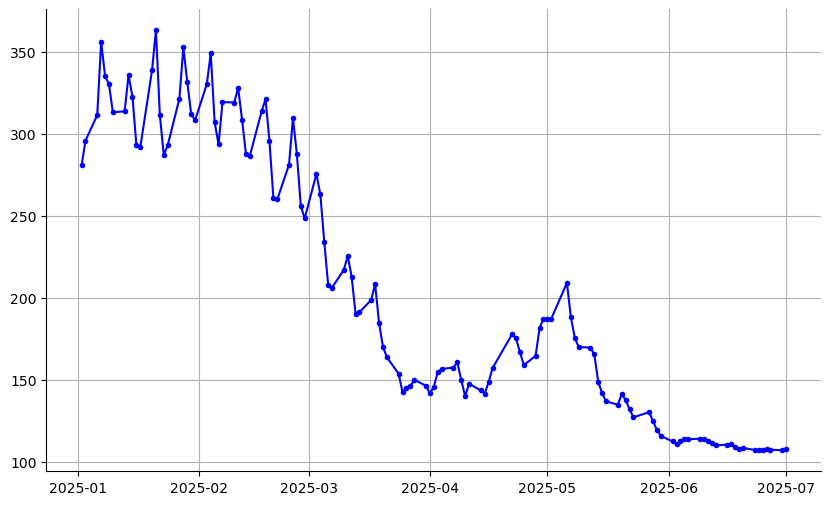

In [166]:
plt.figure(figsize=(10, 6))
plt.plot(price, marker='.', linestyle='-', color='b')
plt.grid(True)
sns.despine()

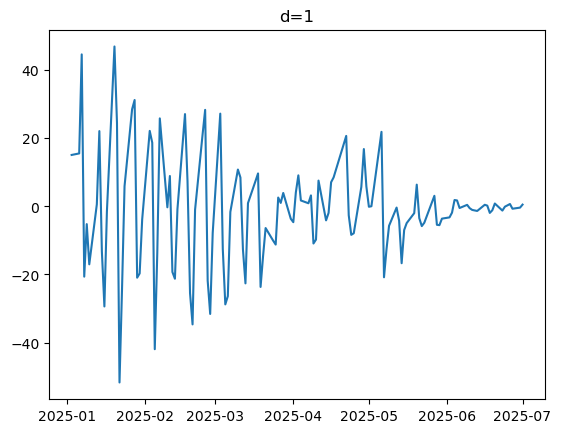

In [171]:
price_diff = price.diff(1)
price_diff = price_diff.dropna()
plt.figure()
plt.plot(price_diff)
plt.title('d=1')
plt.show()

/var/folders/90/3xy67qxj76v0lkc50q__s4t80000gn/T/ipykernel_32734/1499243060.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


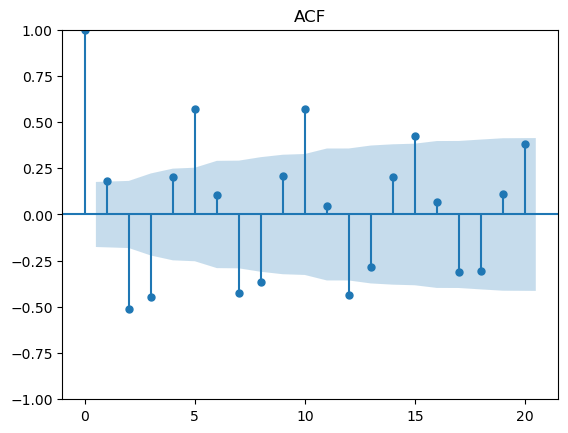

In [172]:
acf = plot_acf(price_diff, lags=20)
plt.title("ACF")
acf.show()

/var/folders/90/3xy67qxj76v0lkc50q__s4t80000gn/T/ipykernel_32734/3766438781.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


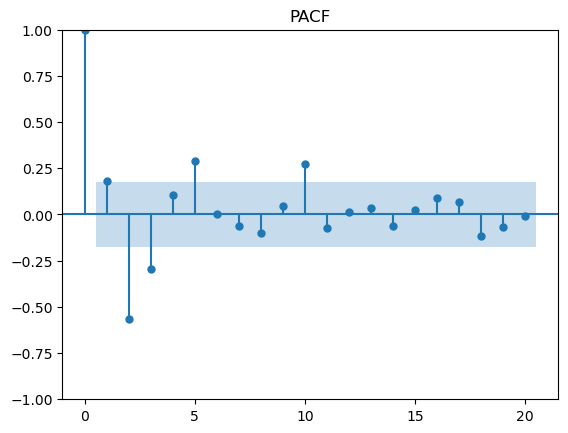

In [173]:
pacf = plot_pacf(price_diff, lags=20)
plt.title("PACF")
pacf.show()

In [174]:
model = ARIMA(price_diff, order=(6, 1, 6))

/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [175]:
results = model.fit()

/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [176]:
forecast = results.forecast(steps=5)

/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/fanxinwei/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [177]:
forecast

124   -2.085694
125   -2.212697
126   -0.894129
127   -1.032461
128   -1.495886
Name: predicted_mean, dtype: float64